In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import time
from sklearn.metrics import auc, roc_curve, roc_auc_score,confusion_matrix
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib

In [28]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import BatchNormalization, LeakyReLU
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.callbacks.callbacks import EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
dataset1 = pd.read_csv('/content/drive/My Drive/Project/Project/final_dataset.csv')

In [0]:
dataset1 = dataset1.drop(columns=['Unnamed: 0'])

In [0]:
X=[]
y=[]
X = dataset1.iloc[:,:-2].to_numpy()
y = dataset1.iloc[:,-2].to_numpy()

In [0]:
def plot_roc(y_pred_val, y_testlb_val, y_predlb_val, classifier,count):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(len(np.unique(y_pred_val))):
    fpr[i], tpr[i], _ = roc_curve(y_testlb_val[:, i], y_predlb_val[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  n_classes = len(np.unique(y_pred_val))
  print('n_classes',n_classes)
  print('fpr[i] ',fpr[i])
  print('tpr[i] ',tpr[i])
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    # Plot all ROC curves
  plt.figure()
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
               label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristics '+classifier)
  plt.legend(loc="lower right")
  plt.savefig('ROC '+classifier+' '+str(count)+'.png')
  plt.show()
  plt.clf()

In [0]:
def plot_F1score_metrics(title_,list_,l1,l2,l3,l4,l5,l6):
    matplotlib.rc('figure', figsize=(13, 5))

    plt.title(title_)
    plt.plot(list_[0],'y',list_[1], 'r',list_[2],'g' ,list_[3],'b',markersize=15)
    [a,b,c,d] = plt.plot(list_[0],'yo',list_[1], 'ro',list_[2],'go',list_[3],'bo',markersize=10)
    plt.legend([a,b,c,d], [l1,l2,l3,l4,l5,l6], loc=9,prop={'size': 12})
    plt.show()

TRAIN: [     0      1      2 ... 536761 536762 536763] TEST: [    18     20     22 ... 536750 536753 536755]
n_classes 10
fpr[i]  [0.00000000e+00 5.42979648e-04 1.00000000e+00]
tpr[i]  [0.         0.07102804 1.        ]


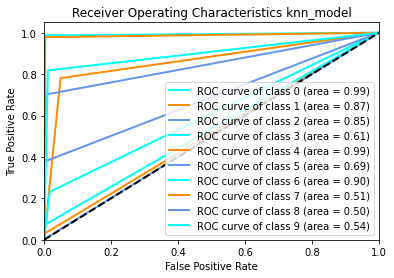

Time taken by Nearest Neighbor model:  208.17670700000002 seconds 

F1 score at each iteration:  0.9175151136903487 

ROC_AUC score for iteration:  0.7443312038199054 

TRAIN: [     0      1      2 ... 536760 536762 536763] TEST: [     6      9     12 ... 536741 536746 536761]
n_classes 10
fpr[i]  [0.00000000e+00 7.48937445e-04 1.00000000e+00]
tpr[i]  [0.         0.08037383 1.        ]


<Figure size 432x288 with 0 Axes>

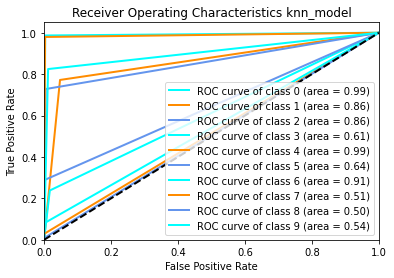

Time taken by Nearest Neighbor model:  204.19084399999997 seconds 

F1 score at each iteration:  0.918074017493689 

ROC_AUC score for iteration:  0.7422406857039817 

TRAIN: [     1      2      3 ... 536761 536762 536763] TEST: [     0      4      5 ... 536748 536754 536757]
n_classes 10
fpr[i]  [0.00000000e+00 5.05532775e-04 1.00000000e+00]
tpr[i]  [0.         0.08037383 1.        ]


<Figure size 432x288 with 0 Axes>

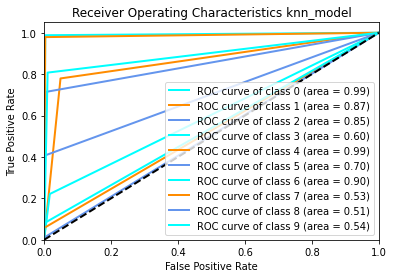

Time taken by Nearest Neighbor model:  200.12601499999994 seconds 

F1 score at each iteration:  0.9176082643242387 

ROC_AUC score for iteration:  0.7476284886127165 

TRAIN: [     0      2      4 ... 536761 536762 536763] TEST: [     1      3     10 ... 536756 536759 536760]
n_classes 10
fpr[i]  [0.00000000e+00 7.77029874e-04 1.00000000e+00]
tpr[i]  [0.         0.09141791 1.        ]


<Figure size 432x288 with 0 Axes>

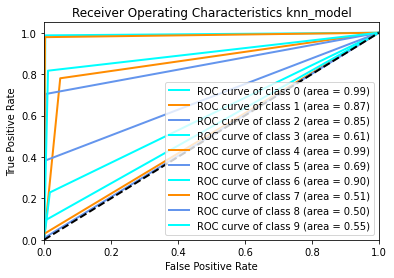

Time taken by Nearest Neighbor model:  201.94692099999997 seconds 

F1 score at each iteration:  0.9176082643242387 

ROC_AUC score for iteration:  0.7457111033569253 

TRAIN: [     0      1      3 ... 536759 536760 536761] TEST: [     2      8     16 ... 536758 536762 536763]
n_classes 10
fpr[i]  [0.00000000e+00 7.48951468e-04 1.00000000e+00]
tpr[i]  [0.         0.06902985 1.        ]


<Figure size 432x288 with 0 Axes>

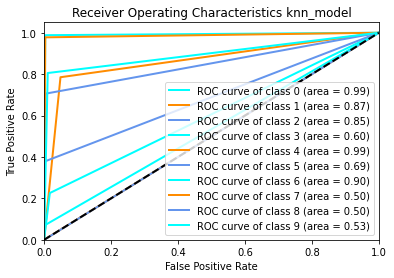

Time taken by Nearest Neighbor model:  189.20428300000003 seconds 

F1 score at each iteration:  0.9173187271778821 

ROC_AUC score for iteration:  0.7421805731123935 

F1 score for Nearest Neighbor model prediction:  [0.9175151136903487, 0.918074017493689, 0.9176082643242387, 0.9176082643242387, 0.9173187271778821] 

ROC_AUC score for Nearest Neighbor model prediction:  [0.7443312038199054, 0.7422406857039817, 0.7476284886127165, 0.7457111033569253, 0.7421805731123935] 



<Figure size 432x288 with 0 Axes>

In [8]:
# Training Model with Nearest Neighbors Classifier :
skf = StratifiedKFold(n_splits=5,shuffle = True)
nn_score = []
nn_time = []
roc_score = []


for train_index, test_index in skf.split(X, y):
     count = 0
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     s = time.clock()

     knn_model = KNeighborsClassifier(n_neighbors=5)
     knn_model.fit(X_train,y_train)
     y_pred = knn_model.predict(X_test)
     e = time.clock() - s
     nn_time.append(e) 

     lb = preprocessing.LabelBinarizer()
     y_testlb = lb.fit_transform(y_test)
     y_predlb = lb.fit_transform(y_pred)

     score = f1_score(y_test,y_pred, average='micro')
     nn_score.append(score)
     score1 = roc_auc_score(y_testlb,y_predlb)
     roc_score.append(score1)
     plot_roc(y_pred, y_testlb, y_predlb, 'knn_model',count)
     count+=1

     print("Time taken by Nearest Neighbor model: ", e,"seconds \n")
     print("F1 score at each iteration: ",score,'\n')
     print("ROC_AUC score for iteration: ",score1,'\n')

print("F1 score for Nearest Neighbor model prediction: ",nn_score,'\n')
print("ROC_AUC score for Nearest Neighbor model prediction: ",roc_score,'\n')

TRAIN: [     0      1      2 ... 536760 536762 536763] TEST: [    15     16     18 ... 536755 536757 536761]
n_classes 8
fpr[i]  [0.00000000e+00 3.72724054e-05 1.00000000e+00]
tpr[i]  [0. 0. 1.]


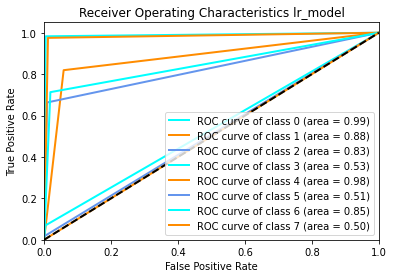

Time taken by Logistic Regression model:  630.5404070000001 seconds 

F1 score at each iteration:  0.9056290928059766 

ROC_AUC score for iteration:  0.758258421063365 

TRAIN: [     0      3      4 ... 536757 536761 536763] TEST: [     1      2      5 ... 536759 536760 536762]
n_classes 8
fpr[i]  [0.00000000e+00 9.31810134e-06 1.00000000e+00]
tpr[i]  [0. 0. 1.]


<Figure size 432x288 with 0 Axes>

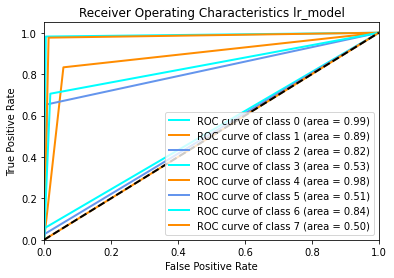

Time taken by Logistic Regression model:  615.4995609999999 seconds 

F1 score at each iteration:  0.9057688187568116 

ROC_AUC score for iteration:  0.7579425608258834 

TRAIN: [     0      1      2 ... 536760 536761 536762] TEST: [     6     10     17 ... 536753 536756 536763]
n_classes 8
fpr[i]  [0.00000000e+00 9.31810134e-06 1.00000000e+00]
tpr[i]  [0. 0. 1.]


<Figure size 432x288 with 0 Axes>

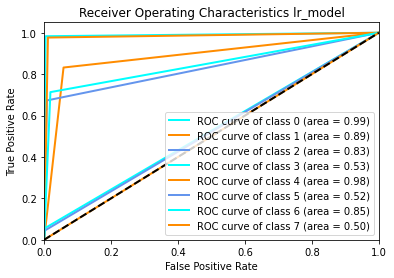

Time taken by Logistic Regression model:  618.3977600000003 seconds 

F1 score at each iteration:  0.9073430644695537 

ROC_AUC score for iteration:  0.7607750301715545 

TRAIN: [     0      1      2 ... 536761 536762 536763] TEST: [     3      7     12 ... 536750 536752 536754]
n_classes 8
fpr[i]  [0.00000000e+00 1.86362027e-05 1.00000000e+00]
tpr[i]  [0. 0. 1.]


<Figure size 432x288 with 0 Axes>

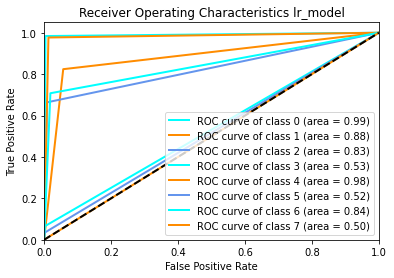

Time taken by Logistic Regression model:  583.9322520000001 seconds 

F1 score at each iteration:  0.9068959414268815 

ROC_AUC score for iteration:  0.7593841704943651 

TRAIN: [     1      2      3 ... 536761 536762 536763] TEST: [     0      4      8 ... 536742 536744 536746]
n_classes 8
fpr[i]  [0.00000000e+00 1.86362027e-05 1.00000000e+00]
tpr[i]  [0. 0. 1.]


<Figure size 432x288 with 0 Axes>

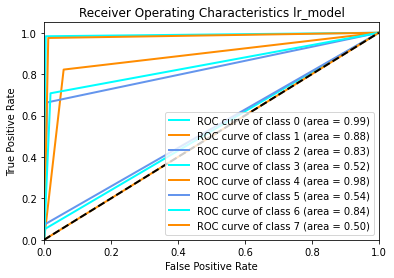

Time taken by Logistic Regression model:  608.837873 seconds 

F1 score at each iteration:  0.9051251956181534 

ROC_AUC score for iteration:  0.7605356978612194 

F1 score for Logistic Regression model prediction:  [0.9056290928059766, 0.9057688187568116, 0.9073430644695537, 0.9068959414268815, 0.9051251956181534] 

ROC_AUC score for Logistic Regression model prediction:  [0.758258421063365, 0.7579425608258834, 0.7607750301715545, 0.7593841704943651, 0.7605356978612194] 



<Figure size 432x288 with 0 Axes>

In [9]:
# Training Model with Logistic Regression Classifier :
skf = StratifiedKFold(n_splits=5,shuffle = True)
lr_score = []
lr_time = []
roc_score = []
#cv_folds = [(train_index, eval_index) for train_index, eval_index in skf.split(X,y)]



for train_index, test_index in skf.split(X, y):
     count = 0
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

     s = time.clock()
     
     lr_model = LogisticRegression(random_state=0,max_iter=20000,solver = 'lbfgs')
     lr_model.fit(X_train, y_train)
     y_pred = lr_model.predict(X_test)

     e = time.clock() - s
     lr_time.append(e) 

     lb = preprocessing.LabelBinarizer()
     y_testlb = lb.fit_transform(y_test)
     y_predlb = lb.fit_transform(y_pred)
     
     score = f1_score(y_test,y_pred, average='micro')
     lr_score.append(score)
     score1 = roc_auc_score(y_testlb,y_predlb)
     roc_score.append(score1)
     plot_roc(y_pred, y_testlb, y_predlb, 'lr_model',count)
     count+=1

     print("Time taken by Logistic Regression model: ", e,"seconds \n")
     print("F1 score at each iteration: ",score,'\n')
     print("ROC_AUC score for iteration: ",score1,'\n')

print("F1 score for Logistic Regression model prediction: ",lr_score,'\n')
print("ROC_AUC score for Logistic Regression model prediction: ",roc_score,'\n')

TRAIN: [     0      1      2 ... 536761 536762 536763] TEST: [     4     10     12 ... 536745 536747 536751]
n_classes 10
fpr[i]  [0.00000000e+00 6.83405419e-04 1.00000000e+00]
tpr[i]  [0.         0.14018692 1.        ]


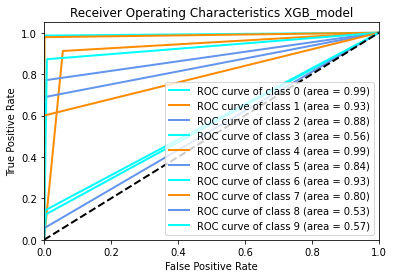

Time taken by xgboost model:  917.3762040000006 seconds 

F1 score at each iteration:  0.9305655174983466 

ROC_AUC score for iteration:  0.8025648753980728 

TRAIN: [     0      2      4 ... 536758 536759 536761] TEST: [     1      3      9 ... 536760 536762 536763]
n_classes 10
fpr[i]  [0.00000000e+00 7.48937445e-04 1.00000000e+00]
tpr[i]  [0.         0.17383178 1.        ]


<Figure size 432x288 with 0 Axes>

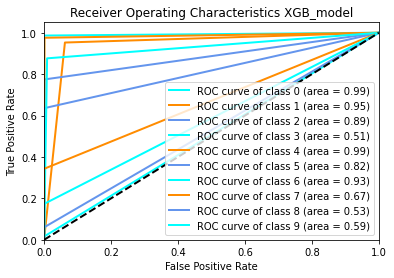

Time taken by xgboost model:  916.7265099999995 seconds 

F1 score at each iteration:  0.9299227781245052 

ROC_AUC score for iteration:  0.7858883078920005 

TRAIN: [     0      1      3 ... 536760 536762 536763] TEST: [     2      7     11 ... 536758 536759 536761]
n_classes 10
fpr[i]  [0.00000000e+00 5.61703084e-04 1.00000000e+00]
tpr[i]  [0.         0.15700935 1.        ]


<Figure size 432x288 with 0 Axes>

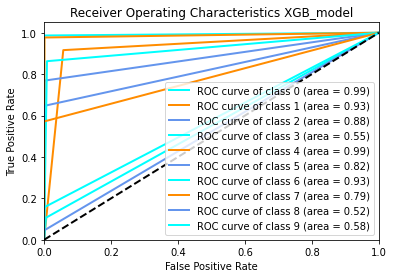

Time taken by xgboost model:  915.741113 seconds 

F1 score at each iteration:  0.9294290797648878 

ROC_AUC score for iteration:  0.7980753183034737 

TRAIN: [     0      1      2 ... 536761 536762 536763] TEST: [     6     16     24 ... 536744 536748 536754]
n_classes 10
fpr[i]  [0.00000000e+00 5.24261119e-04 1.00000000e+00]
tpr[i]  [0.         0.11940299 1.        ]


<Figure size 432x288 with 0 Axes>

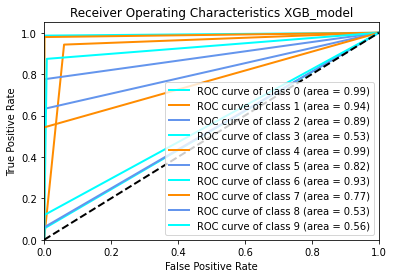

Time taken by xgboost model:  915.5707560000001 seconds 

F1 score at each iteration:  0.9312548321891331 

ROC_AUC score for iteration:  0.7946757795876302 

TRAIN: [     1      2      3 ... 536761 536762 536763] TEST: [     0      5      8 ... 536741 536749 536753]
n_classes 10
fpr[i]  [0.00000000e+00 5.14904134e-04 1.00000000e+00]
tpr[i]  [0.         0.13992537 1.        ]


<Figure size 432x288 with 0 Axes>

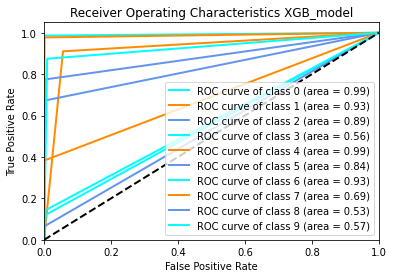

Time taken by xgboost model:  913.4766710000004 seconds 

F1 score at each iteration:  0.9300152768462627 

ROC_AUC score for iteration:  0.7913009864526479 

F1 score for xgboost  model prediction:  [0.9305655174983466, 0.9299227781245052, 0.9294290797648878, 0.9312548321891331, 0.9300152768462627] 

ROC_AUC score for xgboost model prediction:  [0.8025648753980728, 0.7858883078920005, 0.7980753183034737, 0.7946757795876302, 0.7913009864526479] 



<Figure size 432x288 with 0 Axes>

In [10]:
# Training Model with xgboost classifier :
xg_score = []
xg_time = []
roc_score=[]

for train_index, test_index in skf.split(X, y):
     count = 0
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     
     s = time.clock()


     XGB_model = XGBClassifier(learning_rate =0.1, n_estimators=100, num_class = 12,
                             min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
                             objective= 'multi:softmax', nthread=4,scale_pos_weight=1,
                             seed=27, early_stopping_rounds=70, verbose=False)

     XGB_model.fit(X_train,y_train)

     y_pred = XGB_model.predict(X_test)

     e = time.clock() - s
     xg_time.append(e) 
     score = f1_score(y_test,y_pred, average='micro')
     xg_score.append(score)

     lb = preprocessing.LabelBinarizer()
     y_testnb = lb.fit_transform(y_test)
     y_prednb = lb.fit_transform(y_pred)

     score1 = roc_auc_score(y_testnb,y_prednb)
     roc_score.append(score1)
     plot_roc(y_pred, y_testnb, y_prednb, 'XGB_model',count)
     count+=1

     print("Time taken by xgboost model: ", e,"seconds \n")
     print("F1 score at each iteration: ",score,'\n')
     print("ROC_AUC score for iteration: ",score1,'\n')

print("F1 score for xgboost  model prediction: ",xg_score,'\n')
print("ROC_AUC score for xgboost model prediction: ",roc_score,'\n')

TRAIN: [     1      2      4 ... 536761 536762 536763] TEST: [     0      3     11 ... 536730 536738 536750]
n_classes 10
fpr[i]  [0.         0.00488682 1.        ]
tpr[i]  [0.        0.1588785 1.       ]


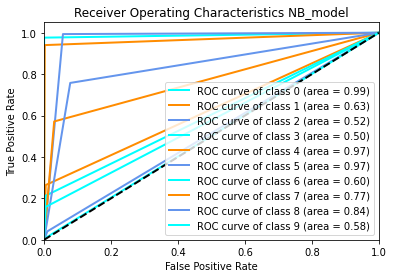

Time taken by NB Gaussian means model:  0.5606900000002497 seconds 

F1 score for iteration:  0.7364544105938499 

ROC_AUC score for iteration:  0.7364544105938499 

TRAIN: [     0      1      3 ... 536761 536762 536763] TEST: [     2      4      7 ... 536746 536748 536759]
n_classes 10
fpr[i]  [0.         0.00683405 1.        ]
tpr[i]  [0.         0.21308411 1.        ]


<Figure size 432x288 with 0 Axes>

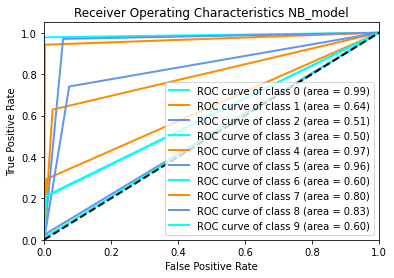

Time taken by NB Gaussian means model:  0.570689999998649 seconds 

F1 score for iteration:  0.74134470976372 

ROC_AUC score for iteration:  0.74134470976372 

TRAIN: [     0      2      3 ... 536759 536761 536763] TEST: [     1      9     16 ... 536757 536760 536762]
n_classes 10
fpr[i]  [0.         0.00798555 1.        ]
tpr[i]  [0.         0.20747664 1.        ]


<Figure size 432x288 with 0 Axes>

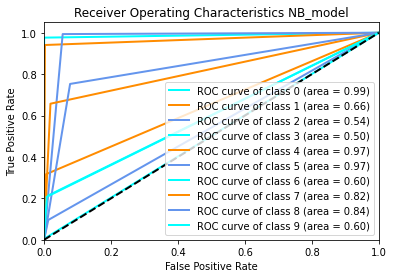

Time taken by NB Gaussian means model:  0.580283999999665 seconds 

F1 score for iteration:  0.7483153583327364 

ROC_AUC score for iteration:  0.7483153583327364 

TRAIN: [     0      1      2 ... 536760 536761 536762] TEST: [     5      6     12 ... 536755 536758 536763]
n_classes 10
fpr[i]  [0.         0.00785455 1.        ]
tpr[i]  [0.         0.22201493 1.        ]


<Figure size 432x288 with 0 Axes>

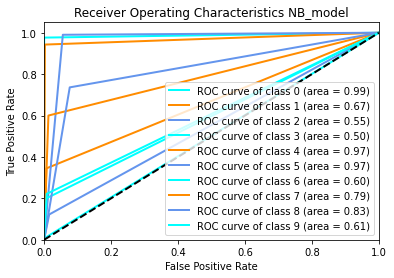

Time taken by NB Gaussian means model:  0.5671070000007603 seconds 

F1 score for iteration:  0.7478103156149237 

ROC_AUC score for iteration:  0.7478103156149237 

TRAIN: [     0      1      2 ... 536760 536762 536763] TEST: [     8     10     15 ... 536749 536752 536761]
n_classes 10
fpr[i]  [0.         0.00816357 1.        ]
tpr[i]  [0.         0.21268657 1.        ]


<Figure size 432x288 with 0 Axes>

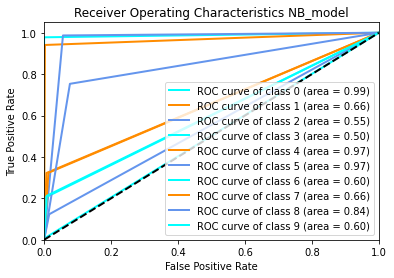

Time taken by NB Gaussian means model:  0.5625319999999192 seconds 

F1 score for iteration:  0.7333435932173407 

ROC_AUC score for iteration:  0.7333435932173407 

F1 score for NB Gaussian model prediction:  [0.8092368168565387, 0.8128696915782512, 0.8151798272987247, 0.8187009212597691, 0.8168734630002236] 

ROC_AUC score for NB Gaussian model prediction:  [0.7364544105938499, 0.74134470976372, 0.7483153583327364, 0.7478103156149237, 0.7333435932173407] 



<Figure size 432x288 with 0 Axes>

In [12]:

time_NB =[]
skf = StratifiedKFold(n_splits=5,shuffle = True)
nbscore = []
roc_score=[]


# Training Model with Navie Bayes :


for train_index, test_index in skf.split(X, y):
     count = 0
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     
     s = time.clock()
     NB_model = GaussianNB()
     NB_model.fit(X_train,y_train)
     y_pred = NB_model.predict(X_test)

     e = time.clock() - s
     time_NB.append(e) 
     score = f1_score(y_test,y_pred, average='micro')
     nbscore.append(score)

     lb = preprocessing.LabelBinarizer()
     y_testnb = lb.fit_transform(y_test)
     y_prednb = lb.fit_transform(y_pred)

     score = roc_auc_score(y_testnb,y_prednb)
     roc_score.append(score)
     
     plot_roc(y_pred, y_testnb, y_prednb, 'NB_model',count)
     count+=1

     print("Time taken by NB Gaussian means model: ", e,"seconds \n")
     print("F1 score for iteration: ",score,'\n')
     print("ROC_AUC score for iteration: ",score,'\n')

print("F1 score for NB Gaussian model prediction: ",nbscore,'\n')
print("ROC_AUC score for NB Gaussian model prediction: ",roc_score,'\n')

TRAIN: [     0      1      4 ... 536761 536762 536763] TEST: [     2      3     12 ... 536735 536754 536756]
n_classes 10
fpr[i]  [0.00000000e+00 3.27660132e-04 1.00000000e+00]
tpr[i]  [0.         0.11962617 1.        ]


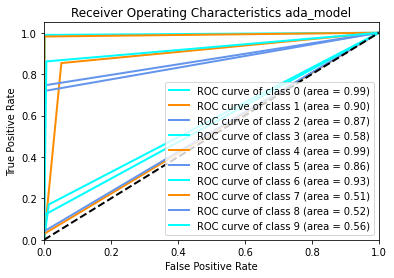

Time taken by Ada model:  867.164299 seconds 

F1 score at iterartion :  0.7715820410138795 

ROC_AUC score for iteration:  0.7715820410138795 

TRAIN: [     0      2      3 ... 536761 536762 536763] TEST: [     1      9     10 ... 536752 536758 536759]
n_classes 10
fpr[i]  [0.0000000e+00 2.4340467e-04 1.0000000e+00]
tpr[i]  [0.         0.12897196 1.        ]


<Figure size 432x288 with 0 Axes>

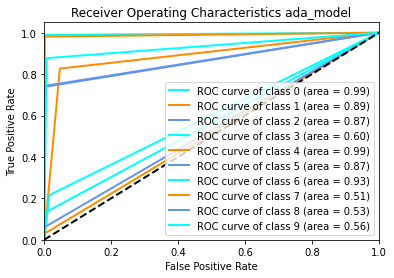

Time taken by Ada model:  870.8242870000013 seconds 

F1 score at iterartion :  0.7756239949316821 

ROC_AUC score for iteration:  0.7756239949316821 

TRAIN: [     0      1      2 ... 536760 536761 536762] TEST: [     8     18     26 ... 536751 536757 536763]
n_classes 10
fpr[i]  [0.00000000e+00 2.52766388e-04 1.00000000e+00]
tpr[i]  [0.         0.14766355 1.        ]


<Figure size 432x288 with 0 Axes>

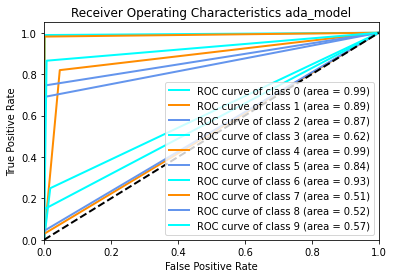

Time taken by Ada model:  870.4873149999985 seconds 

F1 score at iterartion :  0.7739483848090468 

ROC_AUC score for iteration:  0.7739483848090468 

TRAIN: [     1      2      3 ... 536761 536762 536763] TEST: [     0      4     13 ... 536745 536750 536755]
n_classes 10
fpr[i]  [0.0000000e+00 1.9659792e-04 1.0000000e+00]
tpr[i]  [0.         0.14552239 1.        ]


<Figure size 432x288 with 0 Axes>

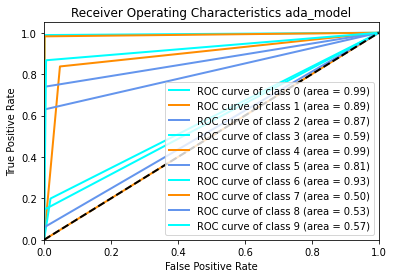

Time taken by Ada model:  830.5572270000011 seconds 

F1 score at iterartion :  0.768509791941882 

ROC_AUC score for iteration:  0.768509791941882 

TRAIN: [     0      1      2 ... 536758 536759 536763] TEST: [     5      6      7 ... 536760 536761 536762]
n_classes 10
fpr[i]  [0.00000000e+00 1.49790294e-04 1.00000000e+00]
tpr[i]  [0.         0.12686567 1.        ]


<Figure size 432x288 with 0 Axes>

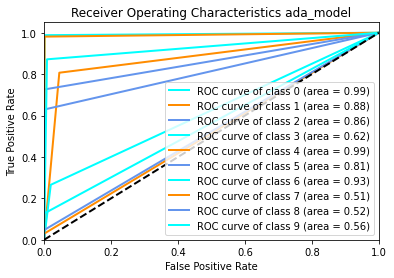

Time taken by Ada model:  947.4546949999985 seconds 

F1 score at iterartion :  0.769635274038952 

ROC_AUC score for iteration:  0.769635274038952 

F1 score for Adaboost model prediction:  [0.9283951077287081, 0.9283112721582071, 0.9278175737985896, 0.9279852449395918, 0.9265314106863403] 

ROC_AUC score for Ada Boost model prediction:  [0.7715820410138795, 0.7756239949316821, 0.7739483848090468, 0.768509791941882, 0.769635274038952] 



<Figure size 432x288 with 0 Axes>

In [13]:
# Training Model with Adaboost Classifier :
ada_score = []
time_ada = []
roc_score=[]
for train_index, test_index in skf.split(X, y):
     count = 0
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     
     s = time.clock()


     ada_model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(min_samples_split=4,random_state=21),n_estimators=100)
     ada_model.fit(X_train,y_train)

     y_pred = ada_model.predict(X_test)

     e = time.clock() - s
     time_ada.append(e) 
     score = f1_score(y_test,y_pred, average='micro')
     ada_score.append(score)

     lb = preprocessing.LabelBinarizer()
     y_testnb = lb.fit_transform(y_test)
     y_prednb = lb.fit_transform(y_pred)

     score = roc_auc_score(y_testnb,y_prednb)
     roc_score.append(score)

     plot_roc(y_pred, y_testnb, y_prednb, 'ada_model',count)
     count+=1

     print("Time taken by Ada model: ", e,"seconds \n")
     print("F1 score at iterartion : ",score,'\n')
     print("ROC_AUC score for iteration: ",score,'\n')

print("F1 score for Adaboost model prediction: ",ada_score,'\n')
print("ROC_AUC score for Ada Boost model prediction: ",roc_score,'\n')

In [0]:
f1 = []
f1.append(nn_score)
f1.append(lr_score)
f1.append(xg_score)
f1.append(nbscore)
f1.append(ada_score)
f1.append(cv_score1)

In [0]:
time = []
time.append(nn_time)
time.append(lr_time)
time.append(xg_time)
time.append(time_NB)
time.append(time_ada)
time.append(time_CNN)

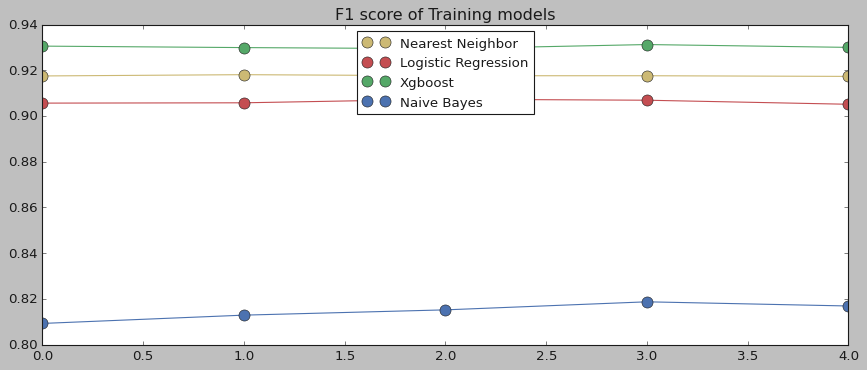

In [55]:
plot_F1score_metrics('F1 score of Training models',f1,"Nearest Neighbor","Logistic Regression","Xgboost","Naive Bayes","Adaboost","CNN")

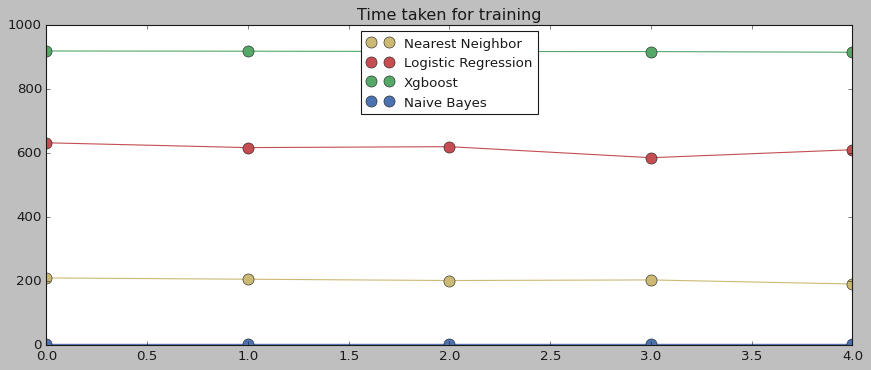

In [56]:
plot_F1score_metrics('Time taken for training',time,"Nearest Neighbor","Logistic Regression","Xgboost","Naive Bayes","Adaboost","CNN")

In [0]:
# plotting f1 score
nn_time_avg = np.mean(nn_time)
lr_time_avg = np.mean(lr_time)
xg_time_avg = np.mean(xg_time)
nb_time_avg = np.mean(time_NB)
ada_time_avg = np.mean(time_ada)
cnn_time_avg = np.mean(time_CNN)

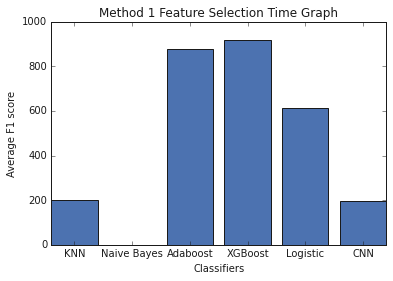

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

data = [nn_time_avg,nb_time_avg,ada_time_avg,xg_time_avg,lr_time_avg,cnn_time_avg]
plt.xlabel('Classifiers')
plt.ylabel('Average F1 score')
plt.title('Method 1 Feature Selection Time Graph')
plt.bar(['KNN','Naive Bayes','Adaboost','XGBoost','Logistic','CNN'], data)
plt.show()

In [0]:
cnn_score = [0.9259266159306214,
0.925227986176446,
0.9256378489655622,
0.9245107262954925,
0.9244727625009316]

In [79]:
# plotting f1 score
nn_score_avg = np.mean(nn_score)
lr_score_avg = np.mean(lr_score)
xg_score_avg = np.mean(xg_score)
nbscore_avg = np.mean(nbscore)
ada_score_avg = np.mean(ada_score)
cnn_score_avg = np.mean(cnn_score)
print(f1_score)

<function f1_score at 0x7f13bd8ee730>


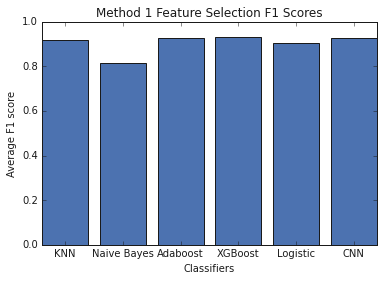

In [80]:
data = [nn_score_avg,nbscore_avg,ada_score_avg,xg_score_avg,lr_score_avg,cnn_score_avg]
plt.xlabel('Classifiers')
plt.ylabel('Average F1 score')
plt.title('Method 1 Feature Selection F1 Scores')
plt.bar(['KNN','Naive Bayes','Adaboost','XGBoost','Logistic','CNN'], data)
plt.show()

In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(39,)))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(0.2))
model.add(Dropout(.4))
model.add(Dense(128))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(0.2))
model.add(Dropout(.4))
model.add(Dense(64))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(0.2))
model.add(Dropout(.4))
model.add(Dense(16))
model.add(BatchNormalization(momentum=0.8))
model.add(LeakyReLU(0.2))
model.add(Dropout(.4))
model.add(Dense(10, activation='softmax'))

In [35]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               10240     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 128)              

In [37]:
skf = StratifiedKFold(n_splits=5,shuffle = True)

time_CNN = []

cv_score1 = []
cv_score2 = []
all_history = []
y_pred_all = []
y_test_all = []

for train_index, test_index in skf.split(X, y):
     print("TRAIN:", train_index, "TEST:", test_index)

     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

     s = time.clock()

     es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5, 
                        restore_best_weights = True, verbose = 1)
     rlrop = ReduceLROnPlateau(monitor = 'val_loss', mode = 'min', patience = 5, 
                               factor = 0.2, min_lr = 1e-6, verbose = 1)

     history = model.fit(X_train, y_train, epochs=50, batch_size=512,
               validation_split=0.2, verbose=1,
               callbacks = [es, rlrop],
               shuffle=True) 
     score1 = model.evaluate(X_test, y_test)
     print('SCORE1:\n', score1)
     y_pred = model.predict(X_test)

     e = time.clock() - s
     time_CNN.append(e)
     print("Time taken by CNN model: ", e,"seconds \n")
     cv_score1.append(score1)
     all_history.append(history)
     y_pred_all.append(y_pred)
     y_test_all.append(y_test)

TRAIN: [     0      1      2 ... 536759 536762 536763] TEST: [     4      7      8 ... 536752 536760 536761]
Train on 343528 samples, validate on 85883 samples
Epoch 1/50
343528/343528 [==============================] - 12s 34us/step - loss: 0.2360 - accuracy: 0.9185 - val_loss: 0.2059 - val_accuracy: 0.9256
Epoch 2/50
343528/343528 [==============================] - 12s 34us/step - loss: 0.2349 - accuracy: 0.9193 - val_loss: 0.2052 - val_accuracy: 0.9261
Epoch 3/50
343528/343528 [==============================] - 11s 33us/step - loss: 0.2348 - accuracy: 0.9194 - val_loss: 0.2047 - val_accuracy: 0.9259
Epoch 4/50
343528/343528 [==============================] - 12s 34us/step - loss: 0.2349 - accuracy: 0.9191 - val_loss: 0.2045 - val_accuracy: 0.9261
Epoch 5/50
343528/343528 [==============================] - 12s 35us/step - loss: 0.2352 - accuracy: 0.9189 - val_loss: 0.2044 - val_accuracy: 0.9261
Epoch 6/50
343528/343528 [==============================] - 11s 33us/step - loss: 0.2349 -

In [0]:
y_pred_class = []
for i in range(5):
  temp = []
  for j in range(len(y_pred_all[i])):
    #temp.append(list(y_pred_all[i]).index(max(y_pred_all[i][j])).any())
    temp.append(y_pred_all[i][j].argmax(axis=0))
  y_pred_class.append(temp)

In [39]:
for i in range(5):
  print(f1_score(y_test_all[i], y_pred_class[i], average='micro'))

0.9259266159306214
0.925227986176446
0.9256378489655622
0.9245107262954925
0.9244727625009316


In [40]:
for i in range(5):
  print("Run ", i)
  print(confusion_matrix(y_test_all[i], y_pred_class[i]))

Run  0
[[42504    85     0     0     4     0   494     0     0    10]
 [    0  8539    36     0    57     0   270     0     0     3]
 [    0   894  1891     1     5     0     6     0     0     0]
 [    3  3093    27     4    60     4    78     0     0     1]
 [    0   829    13     0 42174     4    67     0     0     9]
 [    0    89    22     0    47    47    97     0     0     0]
 [    1   607    14     0    25     0  4200     0     0     3]
 [    0    31     0     0     3     0     1     0     0     0]
 [    1   432     5     0     4     0    24     0     0     0]
 [    2   472     0     0     1     0    18     0     0    42]]
Run  1
[[42481    50     3     0     0     0   548     0     0    14]
 [    3  8466    41     0    40     1   347     0     0     7]
 [    0   898  1893     0     5     0     1     0     0     1]
 [    0  3128     8     1    44     4    84     0     0     1]
 [    1   799    15     0 42201     5    71     0     0     5]
 [    1   104    17     0    16    37   

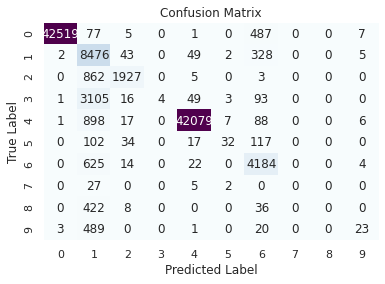

In [41]:
import seaborn as sn
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    sn.set(font_scale=1.0)
    sn.heatmap(cm, cmap="BuPu", annot=True,cbar=False,fmt='d')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.savefig('confusion.png')


cmatrix = confusion_matrix(y_test_all[4], y_pred_class[4], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) #5th iter has best Confusion Matrix
cm = pd.DataFrame(cmatrix, range(10), range(10))
plot_confusion_matrix(cm, ['Normal', 'Exploits', 'Reconnaissance', 'DoS', 'Generic', 'Shellcode', 'Fuzzers', 'Worms', 'Backdoors', 'Analysis'], normalize=False)

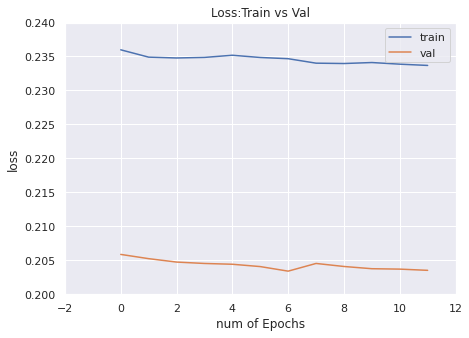

<Figure size 640x480 with 0 Axes>

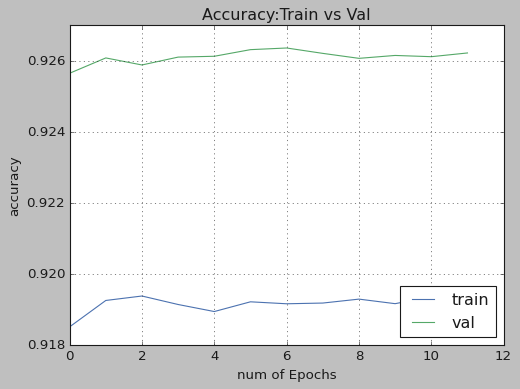

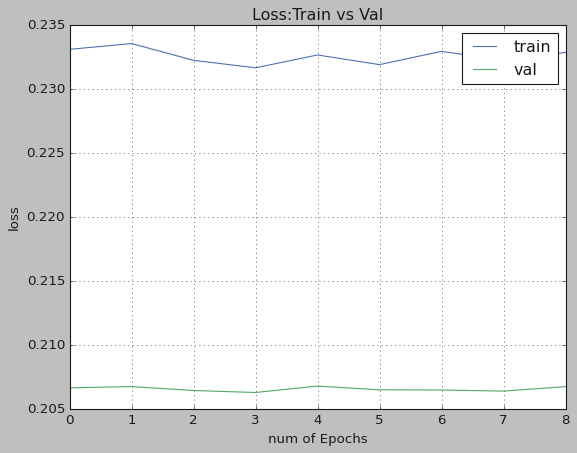

<Figure size 640x480 with 0 Axes>

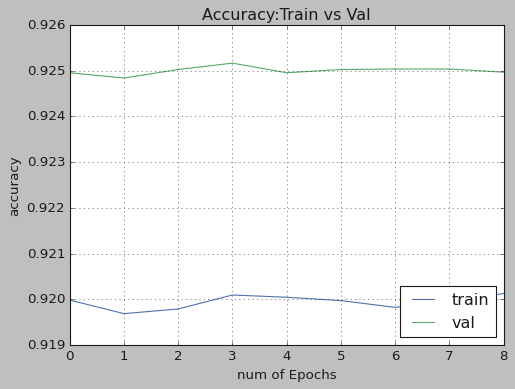

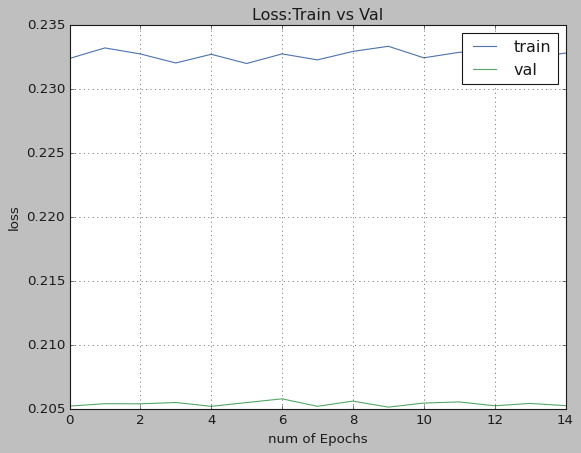

<Figure size 640x480 with 0 Axes>

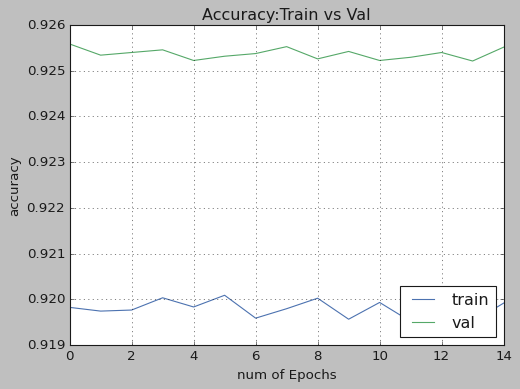

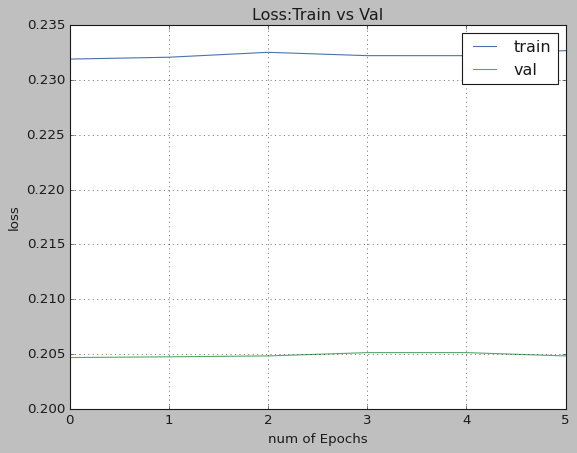

<Figure size 640x480 with 0 Axes>

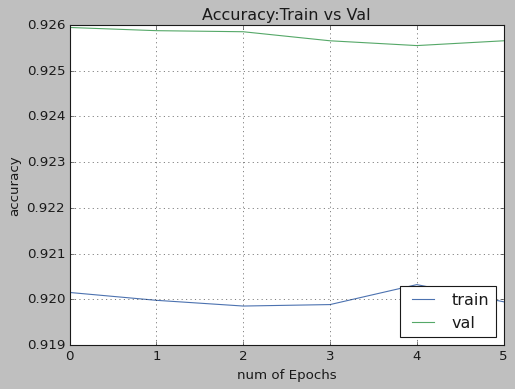

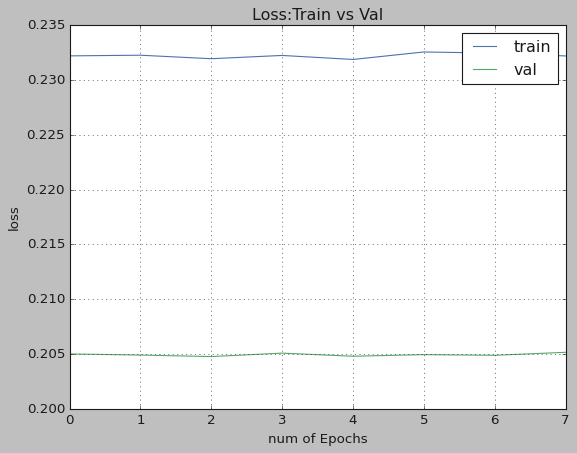

<Figure size 640x480 with 0 Axes>

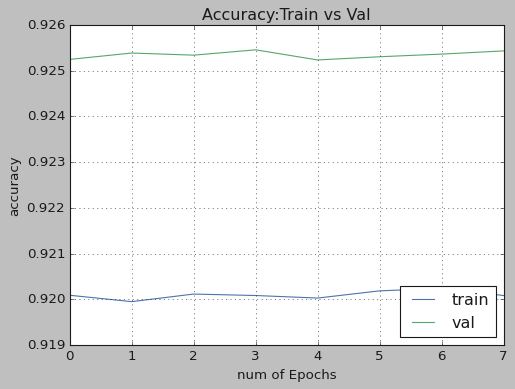

<Figure size 640x480 with 0 Axes>

In [42]:
i=1
for hist in all_history:
  train_loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  train_acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']
  xc = range(len(train_loss))
  plt.figure(1, figsize=(7, 5))
  plt.plot(xc, train_loss)
  plt.plot(xc, val_loss)
  plt.xlabel('num of Epochs')
  plt.ylabel('loss')
  plt.title('Loss:Train vs Val')
  plt.grid(True)
  plt.legend(['train', 'val'])
  plt.style.use(['classic'])
  plt.savefig('Loss_Plot'+str(i)+'.png')
  plt.show()
  plt.clf()

  plt.figure(2, figsize=(7, 5))
  plt.plot(xc, train_acc)
  plt.plot(xc, val_acc)
  plt.xlabel('num of Epochs')
  plt.ylabel('accuracy')
  plt.title('Accuracy:Train vs Val')
  plt.grid(True)
  plt.legend(['train', 'val'], loc=4)
  plt.style.use(['classic'])
  plt.savefig('Accuracy_Plot'+str(i)+'.png')
  plt.show()
  plt.clf()
  i+=1